In [1]:
from simple_esn import SimpleESN
import matplotlib.pyplot as plt
import numpy as np
import librosa
import soundfile as sf
import pandas as pd
import scipy.linalg as la
from IPython import display
from sklearn.utils import check_random_state, check_array
import time

from pythonosc import udp_client, dispatcher, osc_server
import argparse

import seaborn as sns

In [2]:
from pythonosc import udp_client, dispatcher, osc_server
import argparse


In [2]:
from IPython.core.display import HTML
style = """
<style>
div.output_wrapper {
    overflow: show;
}
div.output_scroll {
    min-height: 700px;
    overflow: show;
}
div.output_area img {
    max-width: unset;
}
div.output_subarea img {
    max-width: unset;
}
</style>
"""
HTML(style) 

In [3]:
y, sr = librosa.load('cp1919_WF-00.wav')
y = y/max(y)

128

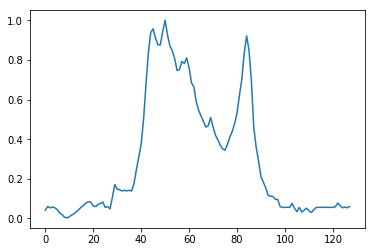

In [6]:
plt.plot(y)
len(y)

In [5]:
%matplotlib inline


In [39]:
esn = SimpleESN(n_readout=20, n_components=20, n_inputs=1, input_gain=3, input_sparcity=1, damping=0.9, random_state=95326, weight_scaling=0.1, sparcity=1.0)

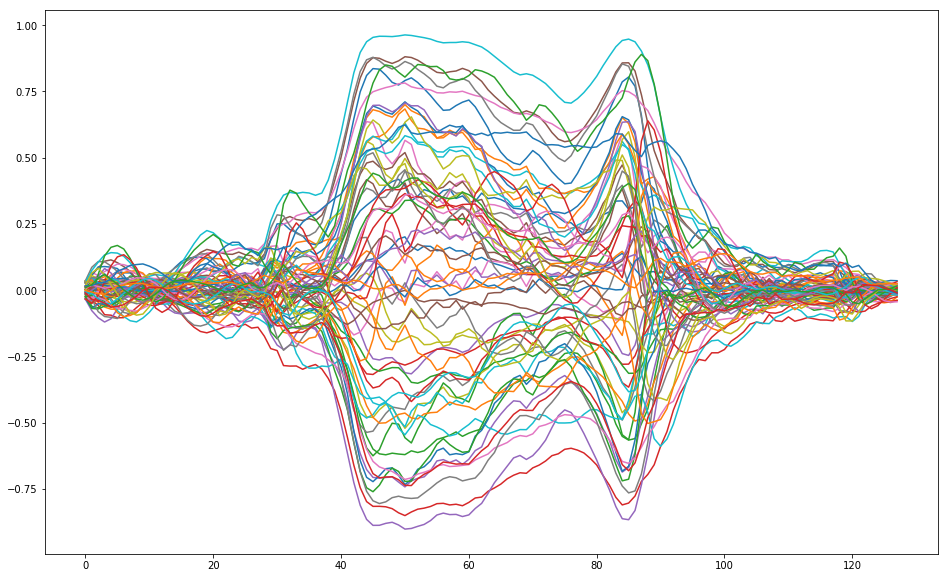

In [25]:
esn = SimpleESN(n_readout=64, 
                n_components=64, 
                n_inputs=1, 
                input_gain=1, 
                input_sparcity=1, 
                damping=0.9, 
                weight_scaling=1, 
                sparcity=1.0,
                random_state=31337)


%matplotlib inline
output = []
fig = plt.gcf()
fig.set_size_inches(16,10)
for i in range(118):
    step=[y[i]]
   
    output.append(esn.step(step))
    
    plt.clf()
    plt.ylim(-1,1)
    plt.plot(np.array(output[:]))
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)

for _ in range(10):
    output.append(esn.step([0]))
    plt.clf()
    plt.plot(np.array(output[:]))
    display.display(plt.gcf())
    
    display.clear_output(wait=True)
    time.sleep(0.05)
    


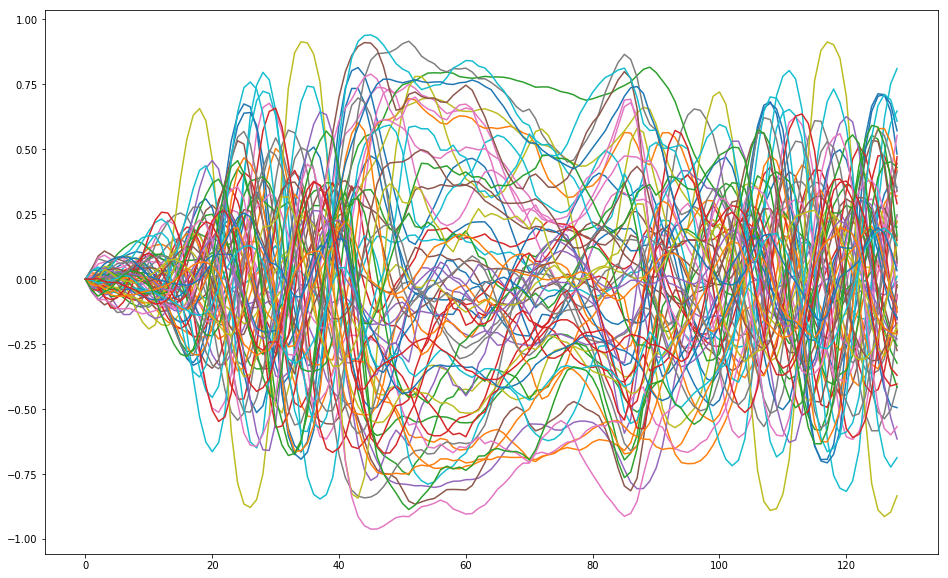

In [109]:
esn = SimpleESN(n_readout=64, 
                n_components=64, 
                n_inputs=1, 
                input_gain=1.5, 
                input_sparcity=0.5, 
                damping=0.8, 
                weight_scaling=1.2, 
                sparcity=0.51)


%matplotlib inline
output = [np.zeros(esn.n_components)]
fig = plt.gcf()
fig.set_size_inches(16,10)
for i in range(118):
    step=[y[i]]
    #if i % 100 is 0:
    #    print(i)
   
    output.append(esn.step(step))

# print(len(np.array(output[0:100]).T[0][0]))
    
for j in range(10):
    output.append(esn.step([0]))
    
plt.clf()

fig.set_size_inches(16,10)
plt.plot(np.array(output))



KeyboardInterrupt: 

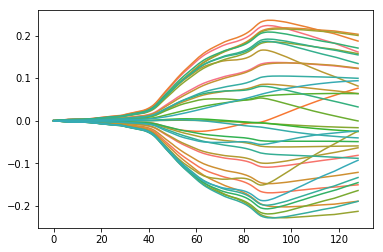

In [83]:
plot = sns.lineplot(data=np.array(output),dashes=False, legend=False)
plot.set(ylim=(-1,1))
plot.get_figure().set_size_inches(16,10)

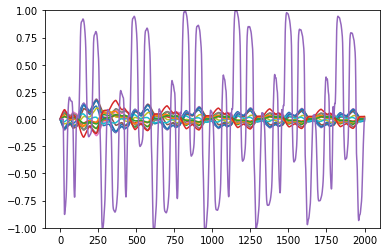

In [33]:
plt.clf()
plt.ylim(-1,1)

fig.set_size_inches(16,10)
plt.plot(np.array((np.array(output[:2000]).T[1:15]).T))
plt.plot(y[:2000])

In [25]:
#  df = pd.DataFrame(dict(time=np.arange(25),
#                          value=np.array(output[])))
esn = SimpleESN(n_readout=64, n_components=64, n_inputs=1, input_gain=1, input_sparcity=1, damping=0.5, weight_scaling=1.3, sparcity=1)
fig = plt.gcf()
fig.set_size_inches(16,10)

output = []
for i in range(len(y)):
    step=[y[i]]
   
    output.append(esn.step(step))

    
for j in range(100):
    output.append(esn.step([0]))

# plot = sns.lineplot(data=np.array(output),dashes=False, legend=False)
# plot.set(ylim=(-1,1))



<Figure size 1152x720 with 0 Axes>

In [13]:

plot.get_figure().savefig('output.png')

In [17]:
esn.random_state

RandomState(MT19937) at 0x1B95966D048

fig=plt.gcf()
fig.savefig('output.png')

In [24]:
np.array(output[:20]).T[:3]

array([[ 0.        , -0.00200144, -0.00397803, -0.00592487, -0.00784307,
        -0.00973087, -0.01158577, -0.0134149 , -0.01521508, -0.0169855 ,
        -0.01872686, -0.02043427, -0.02211453, -0.0237674 , -0.02538937,
        -0.02698218, -0.02854066, -0.03006757, -0.03156683, -0.03303103],
       [ 0.        , -0.004208  , -0.00833239, -0.01236354, -0.01630458,
        -0.02015253, -0.02390289, -0.02757146, -0.03115223, -0.03464422,
        -0.03804964, -0.04135889, -0.04458709, -0.04773438, -0.05079408,
        -0.05377057, -0.05665362, -0.05944987, -0.0621682 , -0.06479371],
       [ 0.        ,  0.0019031 ,  0.003796  ,  0.00567368,  0.00753683,
         0.00938339,  0.01121061,  0.01302489,  0.01482288,  0.01660346,
         0.01836698,  0.02010844,  0.02183398,  0.02354303,  0.02523201,
         0.02690223,  0.02854849,  0.0301731 ,  0.03177948,  0.03336032]])

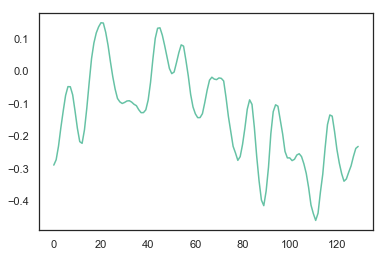

In [22]:

plt.plot( range(130), y[400000:400130])

In [6]:
sns.set()
sns.set_style('white')
sns.set_palette(sns.color_palette('Set2', 25))


In [36]:
choose_colorbrewer_palette()

NameError: name 'choose_colorbrewer_palette' is not defined

In [12]:
np.max(np.abs(la.eig(esn.weights_)[0]))

1.1499999999999926

([array([1., 0., 0., 0., 4., 0., 0., 0., 1., 1.]),
  array([0., 1., 0., 0., 4., 0., 1., 1., 0., 0.]),
  array([0., 2., 0., 0., 4., 0., 0., 0., 1., 0.]),
  array([0., 0., 1., 0., 4., 1., 0., 1., 0., 0.]),
  array([1., 2., 0., 0., 3., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 3., 1., 1., 0., 0., 1.]),
  array([1., 1., 0., 0., 5., 0., 0., 0., 0., 0.])],
 array([-0.81261474, -0.63343925, -0.45426376, -0.27508827, -0.09591278,
         0.08326271,  0.26243819,  0.44161368,  0.62078917,  0.79996466,
         0.97914015]),
 <a list of 7 Lists of Patches objects>)

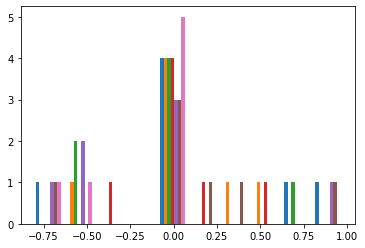

In [6]:
plt.hist(np.arcsin(esn.weights_))

In [8]:
print(esn.weights_)

[[ 6.81590717e-01  0.00000000e+00  2.48795324e-01  0.00000000e+00
  -4.98385646e-01  0.00000000e+00  1.48019319e-01 -5.28336153e-01
   0.00000000e+00  3.95026077e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.72910770e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.54774397e-01  0.00000000e+00
   5.84596121e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.76944835e-02
   0.00000000e+00  1.15187559e-01  0.00000000e+00 -3.57421965e-01
   0.00000000e+00  0.00000000e+00 -4.21016066e-01  0.00000000e+00]
 [ 5.22072408e-01  0.00000000e+00 -6.15924373e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  5.99446830e-01 -2.54604880e-01  0.00000000e+00
   0.00000000e+00 -1.10435294e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  6.42911566e-01  0.00000000e+00]
 [ 0.00

In [79]:
esn.input_weights_

array([[ 0.        , -0.79133281],
       [ 0.06728107, -0.93031874],
       [-0.29524819,  0.        ],
       [ 0.        , -0.83853097],
       [-0.73797457,  0.        ],
       [-0.79558809,  0.82483979],
       [-0.71295287, -0.93058944]])

In [5]:
i=300

In [10]:
step=[y[480000+i], y[500000+i], y[60000+i], y[200000+i]]
i += 1

In [11]:
print(esn.step(step))

[-0.08201698  0.10271518  0.07087403 -0.02058211  0.04143997 -0.04830721]


In [8]:
esn.input_weights_.dot(step)

array([-0.00576191,  0.00538854,  0.070144  , -0.00147441,  0.        ,
        0.        ])

In [27]:
esn.weights_

array([[-6.18190814e-04, -5.64924848e-01, -1.52656675e-01,
        -5.28673076e-01,  0.00000000e+00,  5.84151125e-01],
       [-5.53180569e-01,  8.03822066e-01,  0.00000000e+00,
         7.04248724e-03,  1.84029920e-02, -8.51010530e-01],
       [ 4.07201998e-01,  8.66997878e-01, -5.92502488e-01,
        -6.56200175e-01, -2.19982541e-01,  3.39588763e-01],
       [-8.73665820e-01, -2.29833706e-01,  0.00000000e+00,
         5.08516539e-01, -2.64034955e-01,  3.55941296e-01],
       [ 0.00000000e+00,  8.31086799e-01,  5.90473268e-01,
         1.93745300e-01,  1.13393973e-01,  8.74175808e-01],
       [-4.31079426e-01, -8.53494964e-01, -7.22265182e-01,
         0.00000000e+00,  8.32118591e-01, -1.49714577e-02]])

In [4]:
esn.state_

array([0., 0., 0., 0., 0., 0.])

In [12]:
count=0
outputarray=np.array(output).T
for line in outputarray:
    count+=1
    sf.write(f'periodictanh{count}.wav', line, sr)

In [29]:
len(output)

128

In [110]:
wavebank = np.array(output).T.flatten()

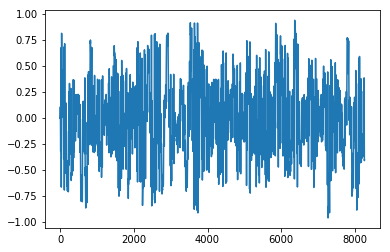

In [111]:
plt.plot(wavebank)

In [33]:
len(wavebank)

8192

In [34]:
8192/64


128.0

In [112]:
sf.write(f'increaseinputgainwavebank.wav', wavebank, sr)

In [113]:
wavebankarray = np.array(output).T.tolist()

In [78]:
np.mean(wavebankarray[2])

-0.29518545058358614

In [114]:
wavebankarray.sort(key=lambda x: np.mean(x))

In [42]:
wavebankdict = [{'s':sample, 'avg':np.mean(sample)} for sample in wavebankarray]

In [58]:
type(wavebankdict)

list

In [59]:
wavebankdict.sort(key=lambda x: x['avg'])

In [62]:
wavebankdict

[{'s': array([-0.02448915, -0.0380479 , -0.05747932, -0.0926834 , -0.0944927 ,
         -0.10427375, -0.10383211, -0.08746841, -0.06581289, -0.04582103,
         -0.0306259 , -0.018646  , -0.02240312, -0.0387112 , -0.06179509,
         -0.08974034, -0.11748936, -0.14001778, -0.15592124, -0.1610705 ,
         -0.15328704, -0.14575641, -0.13669826, -0.12770952, -0.13786202,
         -0.12849217, -0.14316393, -0.13989785, -0.17384138, -0.22056669,
         -0.22800061, -0.28455854, -0.28657731, -0.2861809 , -0.29853159,
         -0.28817938, -0.28056825, -0.29757758, -0.33307699, -0.38033435,
         -0.45668735, -0.55543529, -0.66041059, -0.7452185 , -0.7978162 ,
         -0.81575045, -0.81564195, -0.81739299, -0.8244096 , -0.84015294,
         -0.85063276, -0.83699264, -0.82641636, -0.8225227 , -0.81622908,
         -0.80566183, -0.80430779, -0.81043559, -0.80775348, -0.81342566,
         -0.80086275, -0.78412821, -0.78076252, -0.75903454, -0.74634427,
         -0.73188051, -0.71183938

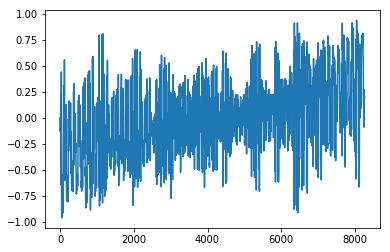

In [115]:
plt.plot(np.array(wavebankarray).flatten())

In [116]:
sf.write(f'increaseinputgainwavebanksorted.wav', np.array(wavebankarray).flatten(), sr)